In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('vowel.dat',header=None,sep = ',')
train = df[df[0] == 0]
test = df[df[0] == 1]

X = train.iloc[:,3:13].to_numpy()
y = train.iloc[:,-1:].to_numpy().reshape(528)
testX = test.iloc[:,3:13].to_numpy()
testy = test.iloc[:,-1:].to_numpy().reshape(462)

numbers = [*range(11)] # number 2 > number 1
number_of_classification = 11


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

test_list_y =testy.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(test_list_y)) if test_list_y[i] == digit]
    digits_indexes.extend(li)

test_x_inputs =[tuple(c) for c in testX[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in testy[digits_indexes].reshape(462,1).tolist()]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

def get_winner(class1):
    
    numbers = [*range(11)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 528
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 125)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-vowel2")
    [stats, winner] = run(config_path)
    
    return winner

In [4]:
winner_list = []
classes = [[5,7,8,9,10],[4,5,6,7,10],[2,3,6,7,10],[1,3,5,7,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:240
number of class2:288

 ****** Running generation 0 ****** 

Population's average fitness: 0.49945 stdev: 0.05644
Best fitness: 0.64962 - size: (2, 2) - species 8 - id 118
Average adjusted fitness: 0.199
Mean genetic distance 2.519, standard deviation 0.502
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.957 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53701 stdev: 0.05366
Best fitness: 0.69129 - size: (3, 3) - species 8 - id 376
Average adjusted fitness: 0.204
Mean genetic distance 2.626, standard deviation 0.592
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 1.240 sec (1.099 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54554 stdev: 0.05583
Best fitness: 0.69697 - size: (2, 3) - species 8 - id 532
Average adjusted fitness: 0.110
Mean genetic distance 2.654, standard deviation 0.588
Population of 198 members in 12 species
Total extinctions:

Population's average fitness: 0.57708 stdev: 0.07510
Best fitness: 0.74053 - size: (5, 7) - species 21 - id 3240
Average adjusted fitness: 0.179
Mean genetic distance 3.130, standard deviation 0.579
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 1.917 sec (1.789 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58826 stdev: 0.07250
Best fitness: 0.74053 - size: (5, 7) - species 21 - id 3240
Average adjusted fitness: 0.224
Mean genetic distance 3.054, standard deviation 0.599
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 1.936 sec (1.835 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58221 stdev: 0.07800
Best fitness: 0.74053 - size: (5, 7) - species 21 - id 3240
Average adjusted fitness: 0.188
Mean genetic distance 3.052, standard deviation 0.581
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 2.204 sec (1.878 average)

 ****** Ru

Population's average fitness: 0.58842 stdev: 0.07587
Best fitness: 0.75379 - size: (5, 6) - species 21 - id 6036
Average adjusted fitness: 0.256
Mean genetic distance 3.081, standard deviation 0.538
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 1.938 sec (1.950 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.58561 stdev: 0.07838
Best fitness: 0.75379 - size: (5, 6) - species 21 - id 6036
Average adjusted fitness: 0.193
Mean genetic distance 3.111, standard deviation 0.518
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 1.966 sec (1.940 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.58646 stdev: 0.07611
Best fitness: 0.75379 - size: (5, 6) - species 21 - id 6036
Average adjusted fitness: 0.151
Mean genetic distance 3.109, standard deviation 0.543
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 2.071 sec (1.958 average)

 ****** Ru

Mean genetic distance 3.055, standard deviation 0.527
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 2.197 sec (2.140 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.59345 stdev: 0.07598
Best fitness: 0.75379 - size: (5, 6) - species 21 - id 6036
Average adjusted fitness: 0.188
Mean genetic distance 3.086, standard deviation 0.557
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 2.083 sec (2.139 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.58836 stdev: 0.08113
Best fitness: 0.75379 - size: (5, 6) - species 21 - id 6036
Average adjusted fitness: 0.234
Mean genetic distance 3.053, standard deviation 0.572
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 2.255 sec (2.147 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.58726 stdev: 0.08113
Best fitness: 0.75379 - size: (5, 6) - species 21 - id 6036
Ave

Mean genetic distance 2.980, standard deviation 0.540
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 2.685 sec (2.366 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.58637 stdev: 0.07763
Best fitness: 0.76515 - size: (16, 33) - species 59 - id 16037
Average adjusted fitness: 0.141
Mean genetic distance 3.002, standard deviation 0.545
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 2.574 sec (2.396 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.59124 stdev: 0.07939
Best fitness: 0.76515 - size: (16, 33) - species 59 - id 16037
Average adjusted fitness: 0.229
Mean genetic distance 3.016, standard deviation 0.543
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 2.619 sec (2.428 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.59607 stdev: 0.07978
Best fitness: 0.76515 - size: (16, 33) - species 59 - id 

Mean genetic distance 3.009, standard deviation 0.575
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 2.502 sec (2.624 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.59240 stdev: 0.07606
Best fitness: 0.76515 - size: (16, 33) - species 59 - id 16037
Average adjusted fitness: 0.186
Mean genetic distance 3.034, standard deviation 0.568
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 2.482 sec (2.607 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.59066 stdev: 0.07962
Best fitness: 0.76515 - size: (16, 33) - species 59 - id 16037
Average adjusted fitness: 0.180
Mean genetic distance 3.015, standard deviation 0.586
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 2.574 sec (2.597 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.59303 stdev: 0.08454
Best fitness: 0.76515 - size: (16, 33) - species 59 - 

Population's average fitness: 0.64520 stdev: 0.10768
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.324
Mean genetic distance 3.094, standard deviation 0.528
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 1.509 sec (1.485 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63786 stdev: 0.11147
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.329
Mean genetic distance 3.136, standard deviation 0.520
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 1.508 sec (1.491 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64043 stdev: 0.11284
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.352
Mean genetic distance 3.157, standard deviation 0.513
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 1.471 sec (1.494 average)

 ******

Population's average fitness: 0.66589 stdev: 0.09941
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.247
Mean genetic distance 3.165, standard deviation 0.543
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 1.718 sec (1.689 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65849 stdev: 0.10874
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.226
Mean genetic distance 3.157, standard deviation 0.552
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 1.701 sec (1.678 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.65726 stdev: 0.10831
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.291
Mean genetic distance 3.144, standard deviation 0.552
Population of 207 members in 22 species
Total extinctions: 0
Generation time: 1.758 sec (1.683 average)

 ******

Population's average fitness: 0.66367 stdev: 0.10550
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.285
Mean genetic distance 3.094, standard deviation 0.544
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 2.168 sec (2.047 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.66481 stdev: 0.10217
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.272
Mean genetic distance 3.089, standard deviation 0.545
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 2.122 sec (2.059 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.65546 stdev: 0.11094
Best fitness: 0.81061 - size: (7, 14) - species 30 - id 2253
Average adjusted fitness: 0.353
Mean genetic distance 3.112, standard deviation 0.559
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 1.944 sec (2.066 average)

 ******

Population's average fitness: 0.65524 stdev: 0.10967
Best fitness: 0.82008 - size: (7, 12) - species 69 - id 12472
Average adjusted fitness: 0.344
Mean genetic distance 2.961, standard deviation 0.576
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 2.282 sec (2.285 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.66487 stdev: 0.09795
Best fitness: 0.82008 - size: (7, 12) - species 69 - id 12472
Average adjusted fitness: 0.305
Mean genetic distance 2.961, standard deviation 0.594
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 3.190 sec (2.385 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.66633 stdev: 0.10514
Best fitness: 0.82008 - size: (7, 12) - species 69 - id 12472
Average adjusted fitness: 0.246
Mean genetic distance 2.858, standard deviation 0.619
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 2.204 sec (2.378 average)

 ***

Total extinctions: 0
Generation time: 1.625 sec (1.774 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.64923 stdev: 0.11443
Best fitness: 0.83144 - size: (19, 34) - species 70 - id 17424
Average adjusted fitness: 0.270
Mean genetic distance 2.968, standard deviation 0.483
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 1.788 sec (1.796 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.67243 stdev: 0.10573
Best fitness: 0.83144 - size: (19, 34) - species 70 - id 17424
Average adjusted fitness: 0.277
Mean genetic distance 2.958, standard deviation 0.489
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 1.871 sec (1.766 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.67365 stdev: 0.10650
Best fitness: 0.83144 - size: (19, 34) - species 70 - id 17424
Average adjusted fitness: 0.264
Mean genetic distance 2.985, standard deviation 0.489

Population's average fitness: 0.56268 stdev: 0.05906
Best fitness: 0.67045 - size: (7, 12) - species 25 - id 2469
Average adjusted fitness: 0.178
Mean genetic distance 3.130, standard deviation 0.522
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 1.507 sec (1.430 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.56272 stdev: 0.05933
Best fitness: 0.67045 - size: (7, 12) - species 25 - id 2469
Average adjusted fitness: 0.199
Mean genetic distance 3.120, standard deviation 0.511
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 1.476 sec (1.449 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.56233 stdev: 0.06286
Best fitness: 0.67045 - size: (7, 12) - species 25 - id 2469
Average adjusted fitness: 0.128
Mean genetic distance 3.110, standard deviation 0.516
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 1.588 sec (1.468 average)

 ******

Population's average fitness: 0.56920 stdev: 0.07207
Best fitness: 0.68939 - size: (6, 9) - species 23 - id 3137
Average adjusted fitness: 0.210
Mean genetic distance 3.203, standard deviation 0.567
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 1.688 sec (1.646 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.57339 stdev: 0.06687
Best fitness: 0.68939 - size: (6, 9) - species 23 - id 3137
Average adjusted fitness: 0.146
Mean genetic distance 3.204, standard deviation 0.572
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 1.734 sec (1.656 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.57461 stdev: 0.06416
Best fitness: 0.68939 - size: (6, 9) - species 23 - id 3137
Average adjusted fitness: 0.119
Mean genetic distance 3.212, standard deviation 0.590
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 1.823 sec (1.678 average)

 ****** Ru

Population's average fitness: 0.57837 stdev: 0.06953
Best fitness: 0.69886 - size: (8, 17) - species 56 - id 7150
Average adjusted fitness: 0.210
Mean genetic distance 3.201, standard deviation 0.592
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 2.102 sec (2.368 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.57937 stdev: 0.06722
Best fitness: 0.69886 - size: (8, 17) - species 56 - id 7150
Average adjusted fitness: 0.145
Mean genetic distance 3.146, standard deviation 0.598
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 2.231 sec (2.246 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.58772 stdev: 0.06720
Best fitness: 0.69886 - size: (8, 17) - species 56 - id 7150
Average adjusted fitness: 0.222
Mean genetic distance 3.127, standard deviation 0.610
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 2.369 sec (2.215 average)

 ******

Population's average fitness: 0.58092 stdev: 0.06855
Best fitness: 0.69886 - size: (18, 32) - species 59 - id 10702
Average adjusted fitness: 0.177
Mean genetic distance 3.091, standard deviation 0.535
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 2.701 sec (2.839 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.58324 stdev: 0.07168
Best fitness: 0.69886 - size: (18, 32) - species 59 - id 10702
Average adjusted fitness: 0.188
Mean genetic distance 3.098, standard deviation 0.547
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 2.809 sec (2.880 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.58756 stdev: 0.06843
Best fitness: 0.69886 - size: (18, 32) - species 59 - id 10702
Average adjusted fitness: 0.197
Mean genetic distance 3.102, standard deviation 0.530
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 2.929 sec (2.905 average)

 

Population's average fitness: 0.58330 stdev: 0.07380
Best fitness: 0.70265 - size: (21, 39) - species 73 - id 15642
Average adjusted fitness: 0.168
Mean genetic distance 3.131, standard deviation 0.625
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 3.615 sec (2.883 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.58141 stdev: 0.06719
Best fitness: 0.70265 - size: (21, 39) - species 73 - id 15642
Average adjusted fitness: 0.128
Mean genetic distance 3.066, standard deviation 0.632
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 3.907 sec (2.998 average)

 ****** Running generation 113 ****** 

Population's average fitness: 0.57384 stdev: 0.07047
Best fitness: 0.70265 - size: (10, 20) - species 56 - id 17969
Average adjusted fitness: 0.149
Mean genetic distance 2.975, standard deviation 0.614
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 2.939 sec (3.021 average)


Population's average fitness: 0.53244 stdev: 0.04073
Best fitness: 0.60606 - size: (3, 5) - species 9 - id 1866
Average adjusted fitness: 0.097
Mean genetic distance 3.140, standard deviation 0.532
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 1.392 sec (1.286 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.52908 stdev: 0.04398
Best fitness: 0.60606 - size: (3, 5) - species 9 - id 1866
Average adjusted fitness: 0.101
Mean genetic distance 3.143, standard deviation 0.522
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 1.353 sec (1.309 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.52913 stdev: 0.04707
Best fitness: 0.61932 - size: (4, 9) - species 14 - id 2126
Average adjusted fitness: 0.096
Mean genetic distance 3.160, standard deviation 0.511
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 1.409 sec (1.339 average)

 ****** Runn

Population's average fitness: 0.53386 stdev: 0.04841
Best fitness: 0.62689 - size: (5, 11) - species 14 - id 4245
Average adjusted fitness: 0.132
Mean genetic distance 3.170, standard deviation 0.569
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 1.485 sec (1.640 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.53654 stdev: 0.04949
Best fitness: 0.62689 - size: (4, 7) - species 44 - id 5253
Average adjusted fitness: 0.126
Mean genetic distance 3.148, standard deviation 0.571
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 1.639 sec (1.655 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.53404 stdev: 0.04753
Best fitness: 0.62689 - size: (4, 7) - species 44 - id 5253
Average adjusted fitness: 0.115
Mean genetic distance 3.149, standard deviation 0.563
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 1.580 sec (1.665 average)

 ****** R

Population's average fitness: 0.54031 stdev: 0.04753
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.107
Mean genetic distance 3.189, standard deviation 0.555
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 1.544 sec (1.687 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.53903 stdev: 0.04695
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.115
Mean genetic distance 3.173, standard deviation 0.547
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 2.000 sec (1.731 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.53454 stdev: 0.04869
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.090
Mean genetic distance 3.170, standard deviation 0.548
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 2.083 sec (1.781 average)

 ****** Ru

Population's average fitness: 0.53657 stdev: 0.04587
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.088
Mean genetic distance 3.053, standard deviation 0.627
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 2.485 sec (1.996 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.53526 stdev: 0.04790
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.101
Mean genetic distance 3.033, standard deviation 0.616
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 2.263 sec (1.996 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.53308 stdev: 0.04993
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.120
Mean genetic distance 3.032, standard deviation 0.627
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 2.304 sec (2.016 average)

 ****** Ru


 ****** Running generation 106 ****** 

Population's average fitness: 0.53433 stdev: 0.04887
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.112
Mean genetic distance 3.019, standard deviation 0.638
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 2.105 sec (2.009 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.53092 stdev: 0.05023
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.100
Mean genetic distance 3.030, standard deviation 0.625
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 2.148 sec (2.039 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.53256 stdev: 0.05296
Best fitness: 0.66856 - size: (4, 6) - species 43 - id 7802
Average adjusted fitness: 0.136
Mean genetic distance 3.042, standard deviation 0.622
Population of 201 members in 14 species
Total extinctions: 0
Generation 

In [5]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-vowel2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [6]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(11)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [7]:
number_codes = [[0, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, 0, 1, 1],
[0, 1, 0, 0],
[1, 1, 0, 1],
[0, 1, 1, 0],
[1, 1, 1, 1],
[1, 0, 0, 0],
[1, 0, 0, 1],
[1, 1, 1, 0]]

In [8]:
pred_value = []
error_list = []

for j in range(462):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(11):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/462

0.19696969696969696

In [16]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:0 index:[2] real:0
#1 min_error:0 index:[0] real:1
#2 min_error:0 index:[0] real:2
#3 min_error:0 index:[10] real:3
#4 min_error:0 index:[10] real:4
#5 min_error:1 index:[ 4  5  8 10] real:5
#6 min_error:0 index:[4] real:6
#7 min_error:0 index:[5] real:7
#8 min_error:0 index:[5] real:8
#9 min_error:0 index:[5] real:9
#10 min_error:0 index:[4] real:10
#11 min_error:0 index:[2] real:0
#12 min_error:0 index:[0] real:1
#13 min_error:0 index:[0] real:2
#14 min_error:0 index:[10] real:3
#15 min_error:0 index:[10] real:4
#16 min_error:1 index:[ 4  5  8 10] real:5
#17 min_error:0 index:[4] real:6
#18 min_error:0 index:[5] real:7
#19 min_error:0 index:[5] real:8
#20 min_error:1 index:[1 4 5] real:9
#21 min_error:0 index:[4] real:10
#22 min_error:0 index:[2] real:0
#23 min_error:0 index:[0] real:1
#24 min_error:0 index:[0] real:2
#25 min_error:0 index:[10] real:3
#26 min_error:0 index:[6] real:4
#27 min_error:1 index:[ 4  5  8 10] real:5
#28 min_error:0 index:[4] real:6
#29 min_erro

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[31 28  8  0  0  0  0  0  0  3  0]
 [ 7  0  0  0  0  0  0  0  0  3  0]
 [ 3  1 14  9  3  3  0  0  4  1  5]
 [ 0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  2  1  2  4 11  0  0  1  4]
 [ 0  1  0  1  5  3  4 14 11 13  0]
 [ 0  0 10  7  4  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  2  0]
 [ 0  6  7  6  8 14 10 10 14  7 21]
 [ 1  6  0  0  0  0  0  0  4  8  1]
 [ 0  0  1 18 20 15 16 10  9  3 11]]


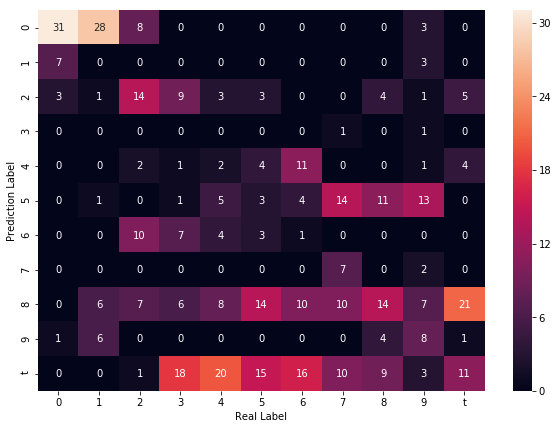

In [15]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789t"],
                  columns = [i for i in "0123456789t"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()